In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [53]:
#data reading
data = pd.read_csv("train.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [54]:
#data cleaning
print("\nMissing values before cleaning:")
print(data.isnull().sum())
num_cols = data.select_dtypes(include=[np.number]).columns
for col in num_cols:
    data[col] = data[col].fillna(data[col].median())


cat_cols = data.select_dtypes(exclude=[np.number]).columns
for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])


print("\nMissing values after cleaning:")
print(data.isnull().sum())


Missing values before cleaning:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing values after cleaning:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [ ]:
# Descriptive statistics for numerical features

print("\nDescriptive Statistics (Numerical):\n", data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].describe())



Descriptive Statistics (Numerical):
        ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  614.000000
mean       5403.459283        1621.245798  145.752443
std        6109.041673        2926.248369   84.107233
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.250000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  164.750000
max       81000.000000       41667.000000  700.000000


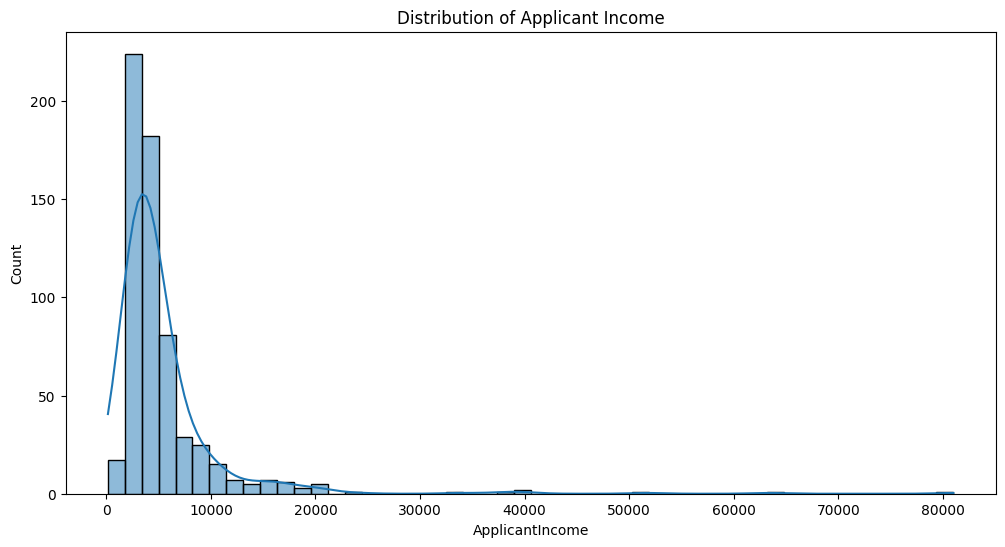

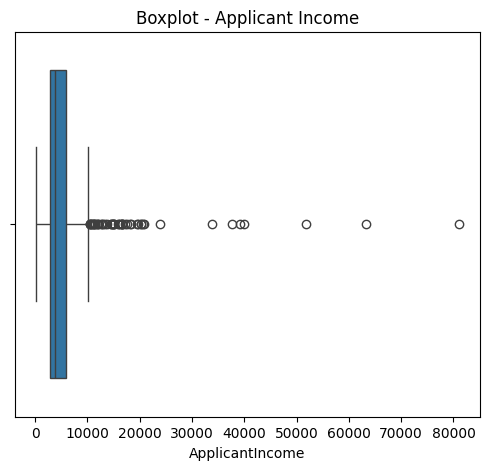

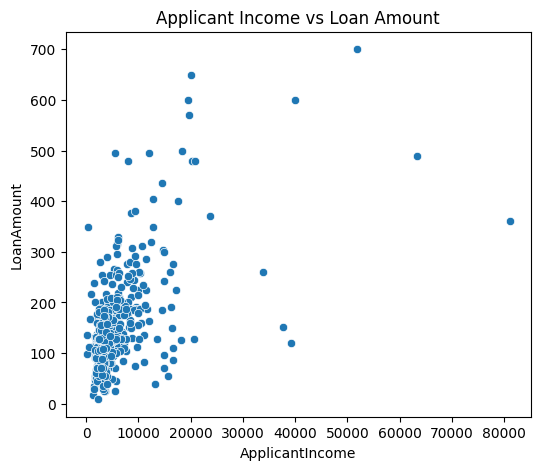

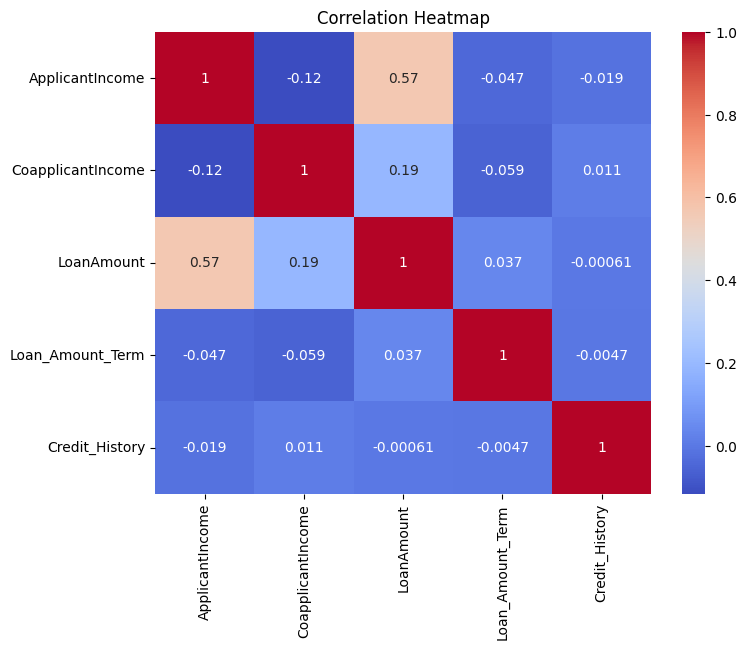

In [56]:
plt.figure(figsize=(12,6))
sns.histplot(data['ApplicantIncome'], kde=True)
plt.title('Distribution of Applicant Income')
plt.show()

plt.figure(figsize=(6,5))
sns.boxplot(x=data['ApplicantIncome'])
plt.title('Boxplot - Applicant Income')
plt.show()

plt.figure(figsize=(6,5))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=data)
plt.title('Applicant Income vs Loan Amount')
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(data.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()

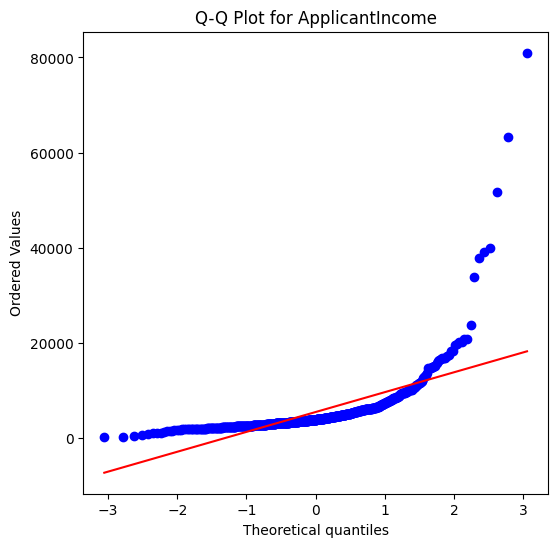

In [57]:
plt.figure(figsize=(6,6))
stats.probplot(data['ApplicantIncome'], dist="norm", plot=plt)
plt.title('Q-Q Plot for ApplicantIncome')
plt.show()

In [58]:
confidence_level = 0.95
sample = data['ApplicantIncome']
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)
n = len(sample)

confidence_interval = stats.t.interval(confidence_level, n-1, loc=sample_mean, scale=sample_std/np.sqrt(n))
print(f"\n95% Confidence Interval for mean ApplicantIncome: {confidence_interval}")



95% Confidence Interval for mean ApplicantIncome: (np.float64(4919.292129904242), np.float64(5887.626436871003))


In [59]:
alpha = 0.05
t_stat, p_value = stats.ttest_1samp(sample, 5000)

print("\nHypothesis Test for Mean ApplicantIncome = 5000:")
print(f"T-statistic = {t_stat}, P-value = {p_value}")

if p_value < alpha:
    print("Reject Null Hypothesis → Mean is significantly different from 5000")
else:
    print("Fail to Reject Null Hypothesis → Mean is not significantly different from 5000")


Hypothesis Test for Mean ApplicantIncome = 5000:
T-statistic = 1.6364804093914873, P-value = 0.10225234862970933
Fail to Reject Null Hypothesis → Mean is not significantly different from 5000


In [60]:
X = data[['ApplicantIncome']]
y = data['LoanAmount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")


Model Evaluation:
MSE: 3035.5594963663366
RMSE: 55.09591179358353
R^2 Score: 0.44237415298173144


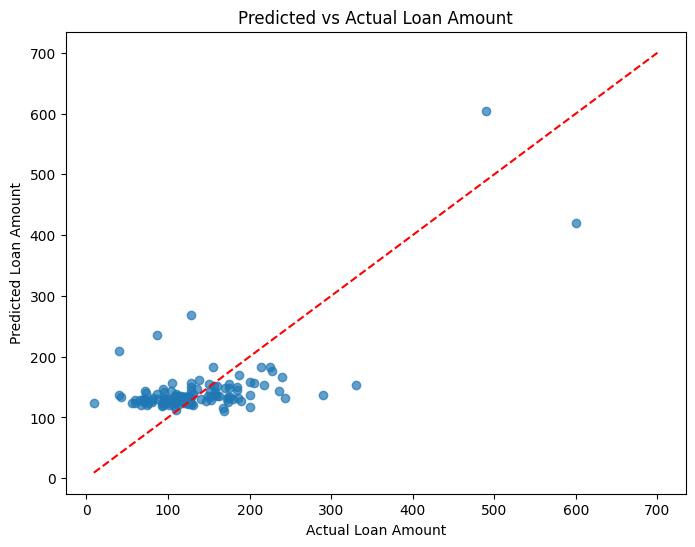

In [61]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Loan Amount")
plt.ylabel("Predicted Loan Amount")
plt.title("Predicted vs Actual Loan Amount")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()